In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
np.random.uniform(0, 1, (1,5))

array([[0.96744763, 0.52946318, 0.61998717, 0.39891043, 0.2596771 ]])

### Problem 1

In [42]:
def sim_1b(lam:float=2, T:int=10):
    
    t = 0              # total accural time taken
    free_channels = 3  # the number of message boxes at facility
    channels = [0, 0, 0]
    
    while t < T:
        t += np.random.exponential(scale=lam)
        
        if free_channels > 0:
            try:
                idx = channels.index(0)
                channels[idx] = t + np.random.exponential(scale=1)  
            except ValueError:
                pass
        
        channels = [0 if i < t else i for i in channels]
        free_channels = len(list(filter(lambda x: x==0, channels)))
        
    return free_channels

In [57]:
P = np.array([sim_1b(lam=2, T=10) for i in range(100)])
print(f'Probability all channels are busy at T. = {(P == 0).sum() / P.size}')

Probability all channels are busy at T. = 0.01


### Problem 2

In [12]:
def sim_2c(rho:int=1, T:int=10):
    
    N = 5
    U = np.random.uniform(0,1, size=N)
    A_prime = T*np.sort(U)
    
    residual = []
    for arrival in A_prime:
        time_remaining = np.random.uniform(arrival, T)
        residual.append(time_remaining)
    return residual

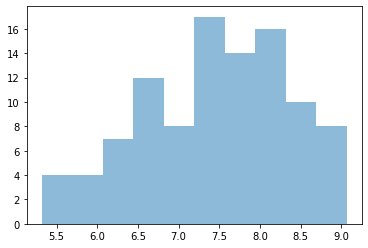

In [23]:
plt.hist([np.array(sim_2c()).mean() for i in range(100)], alpha=0.5)
plt.show()

### Problem 3

In [3]:
inhomogeneous_poisson = lambda t: 2 + np.cos(2*np.pi*t)

In [37]:
def prob3_interarrival(lam:int=3, T:int=10):
    """Interarrival Time Generation Approach"""
    
    t = 0              # total accural time taken
    i = 0
    while t < T:
        U = np.random.uniform(0, 1)
        t = t - np.log(U)/lam
        V = np.random.uniform(0, 1)
        
        if V <= inhomogeneous_poisson(t) / lam:
            i+=1
        
    return i-1

In [43]:
def prob3_conditional(lam:int=3, T:int=10):
    """Conditional Representation Approach"""
    
    nT = np.random.poisson(lam*T)
    U = np.random.uniform(0, 1, size=nT)
    a_prime = T*np.sort(U)
    
    a_prime = np.array([i if (np.random.uniform() <= inhomogeneous_poisson(i) / lam) 
                        else 0 for i in a_prime])
    
    return a_prime[a_prime > 0].size

In [44]:
def prob3_alternative(lam:int=3, T:int=10):
    """Alternative Conditional Approach"""
    
    nT = np.random.poisson(lam*T)
    U = T*np.random.uniform(0, 1, size=nT)
    
    a_prime = np.array([i if (np.random.uniform() <= inhomogeneous_poisson(i) / lam) 
                        else 0 for i in U])
    
    return a_prime[a_prime > 0].size

In [45]:
X1 = np.array([prob3_interarrival() for i in range(1000)])
X2 = np.array([prob3_conditional() for i in range(1000)])
X3 = np.array([prob3_alternative() for i in range(1000)])

print(f'Expectation of N(t) = {X1.mean()}')
print(f'Expectation of N(t) = {X2.mean()}')
print(f'Expectation of N(t) = {X3.mean()}')

Expectation of N(t) = 19.944
Expectation of N(t) = 19.913
Expectation of N(t) = 20.039
